In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Online Retail Data Set.csv', encoding='latin1')

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df= df[df['Description'].notnull()]
df= df[df['CustomerID'].notnull()]

In [9]:
df.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(5225)

In [11]:
df=df.drop_duplicates()

In [12]:
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [13]:
print(df[df['Quantity'] <=0].count())

InvoiceNo      8872
StockCode      8872
Description    8872
Quantity       8872
InvoiceDate    8872
UnitPrice      8872
CustomerID     8872
Country        8872
dtype: int64


In [14]:
print(df[df['Quantity'] >=0].count())

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
dtype: int64


In [15]:
# Convert InvoiceNo to string just in case
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [16]:
# Remove canceled orders
df = df[~df['InvoiceNo'].str.startswith('C')]

In [17]:
df.count()

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
dtype: int64

In [18]:
print(df[df['Quantity'] >0].count())

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
dtype: int64


In [19]:
df = df[df['UnitPrice'] > 0]

In [20]:
print(df.isnull().sum())       # should be 0 or very low
print(df.duplicated().sum())   # should be 0
print(df[df['Quantity'] <= 0]) # should be empty


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [21]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [22]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [23]:
df['date_only'] = df['InvoiceDate'].dt.date
df['Time_only'] = df['InvoiceDate'].dt.time
df['Year'] = df['InvoiceDate'].dt.year

In [24]:
df.count()

InvoiceNo      392692
StockCode      392692
Description    392692
Quantity       392692
InvoiceDate    392692
UnitPrice      392692
CustomerID     392692
Country        392692
date_only      392692
Time_only      392692
Year           392692
dtype: int64

In [25]:
df['Year'].unique()

array([2010, 2011], dtype=int32)

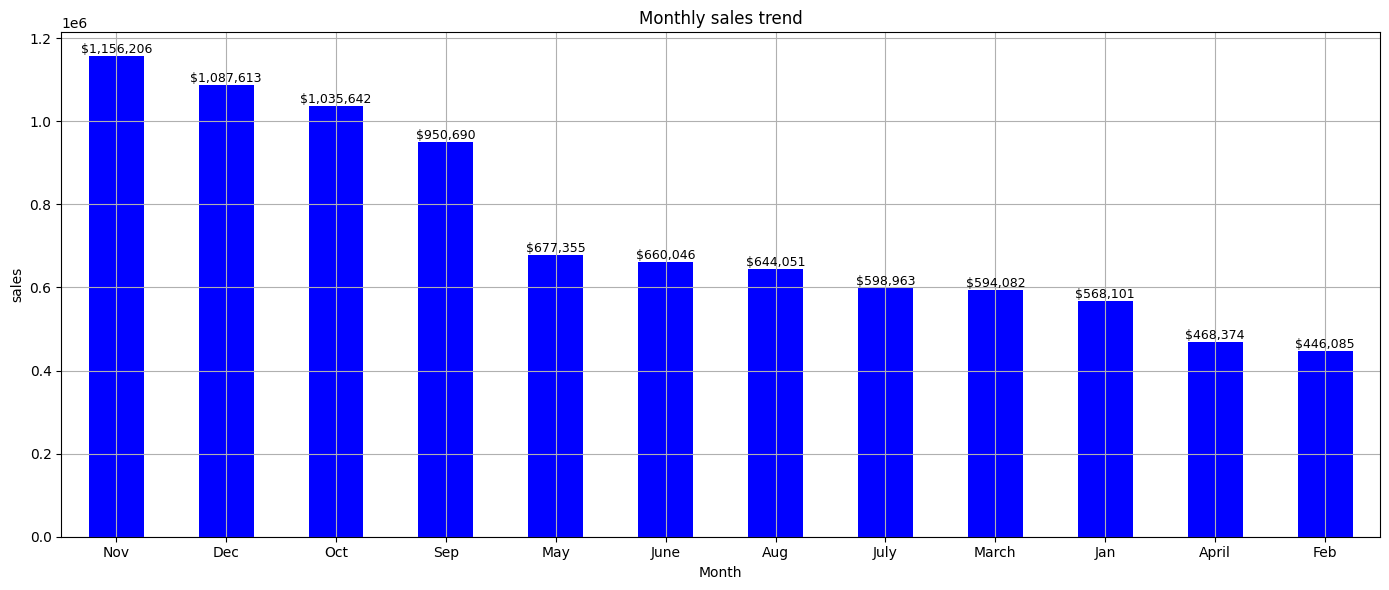

In [26]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')
df['month'] = df['InvoiceDate'].dt.month
df['sales'] = df['Quantity']*df['UnitPrice']

#Sales Trend Over months

sales_month = df.groupby('month')['sales'].sum().sort_values(ascending=False)
month_names = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
#sales_month = sales_month.reindex(month_names.keys())  # Reindex with numeric keys 1-12
sales_month.index = [month_names[i] for i in sales_month.index]



fig,ax = plt.subplots(figsize=(14,6))
sales_month.plot(kind='bar', ax=ax, color='blue')
for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+200,
        f'${height:,.0f}',
        ha='center', va='bottom', fontsize=9    )

ax.set_title('Monthly sales trend')
ax.set_xlabel('Month')
ax.set_ylabel("sales")
ax.grid(True)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


As we can clearly see, we   are having the heigst sale in the end of the year month , and less sales , beginning of the year month

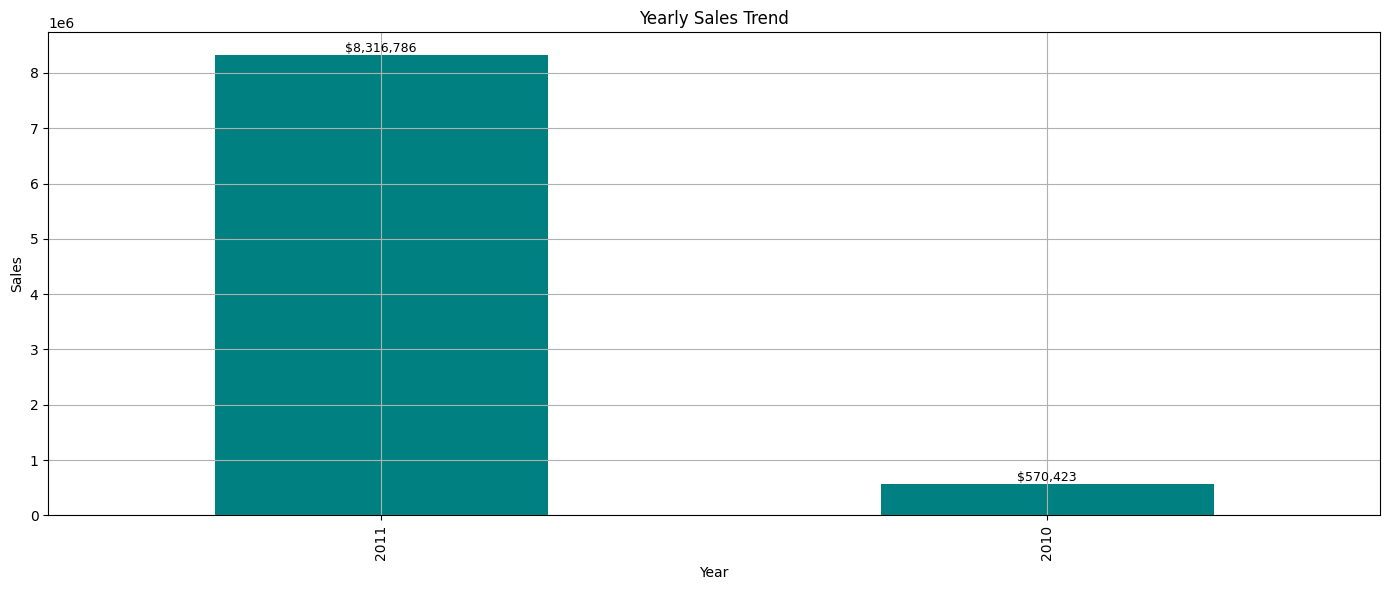

Year
2011    8316786.164
2010     570422.730
Name: sales, dtype: float64


In [27]:
#Sales Tren over year 

Sales_year = df.groupby('Year')['sales'].sum().sort_values(ascending=False)

fig,ax=plt.subplots(figsize=(14,6))
Sales_year.plot(kind='bar', ax=ax, color='teal')
for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+100,
        f'${height:,.0f}',
        ha='center', va='bottom', fontsize=9
    )
ax.set_title('Yearly Sales Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.grid(True)
plt.tight_layout()
plt.xticks()
plt.show()
print(Sales_year)

As per the above chart , we can clearly see that 2011 year has much heigher sales , than 2010, there is a huge diffrence in both the year.

now question is why there is a huge diffrence between both year 

In [28]:
print('How many months of data present for each year' )
df.groupby('Year')['month'].nunique()

How many months of data present for each year


Year
2010     1
2011    12
Name: month, dtype: int64

In [29]:
print('How many totaal orders per year')
df.groupby('Year')['InvoiceDate'].nunique()

How many totaal orders per year


Year
2010     1293
2011    15989
Name: InvoiceDate, dtype: int64

This shows 2011 had more orders than 2010, as we only have on month of data from 2010

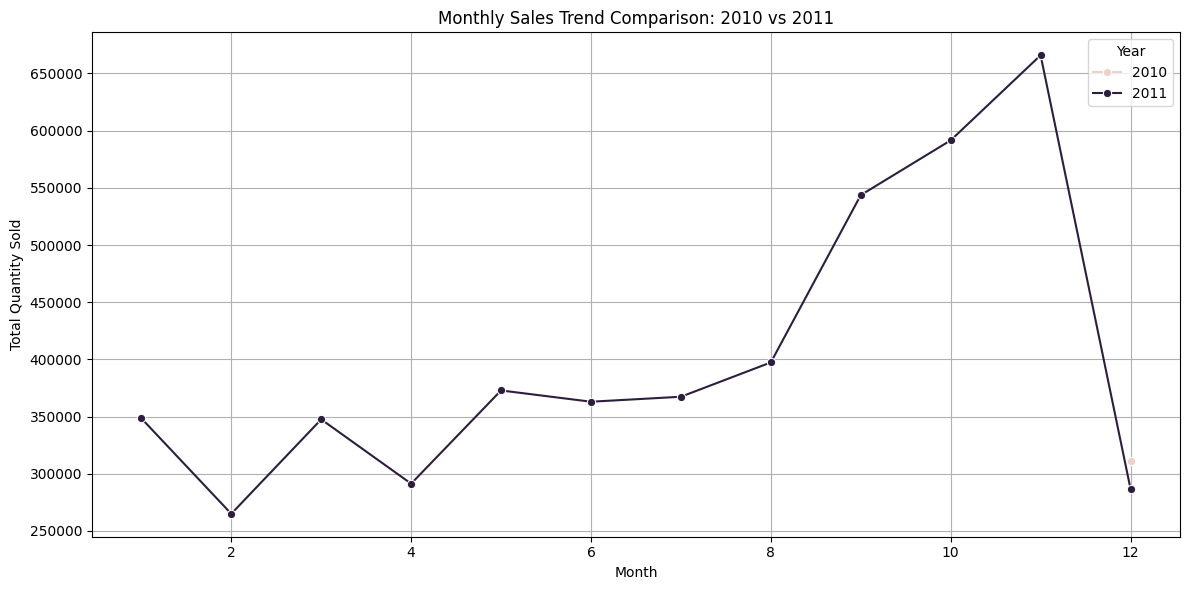

In [30]:
monthly_sales = df.groupby([df['Year'], df['month']])['Quantity'].sum().reset_index()
monthly_sales.columns = ['Year', 'month', 'Total_Quantity']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='Total_Quantity', hue='Year', marker='o')
plt.title("Monthly Sales Trend Comparison: 2010 vs 2011")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


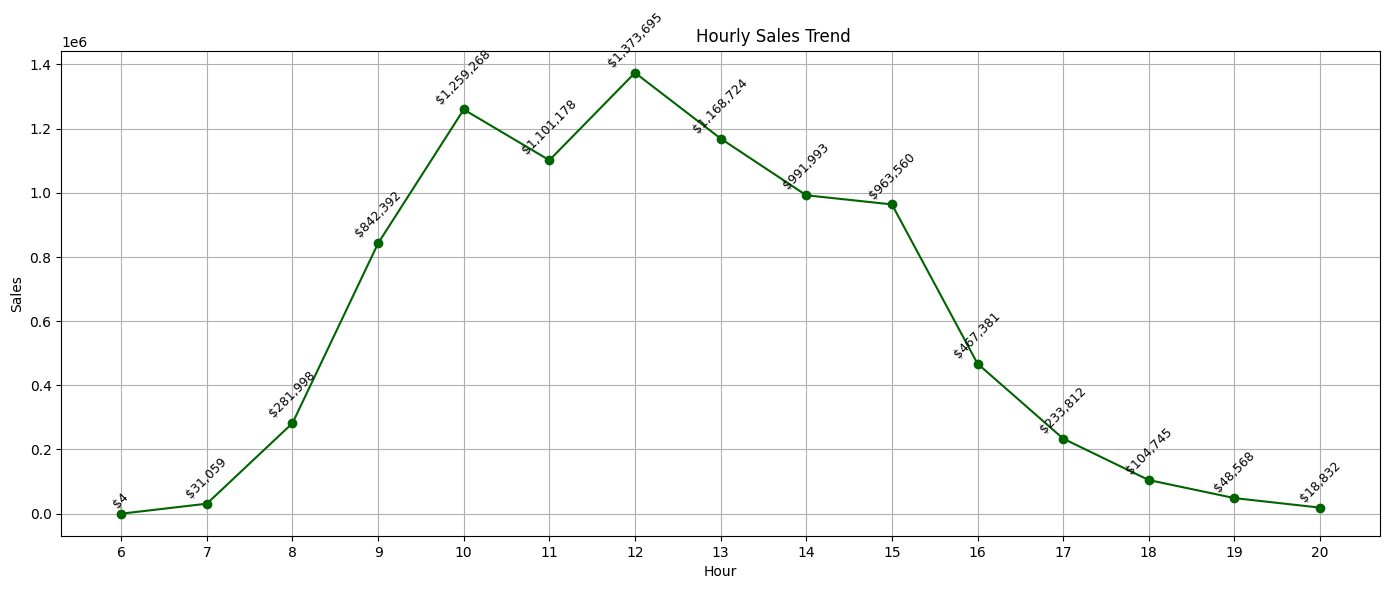

In [31]:
#Hourly Sales Trend 
df['hour'] = df['InvoiceDate'].dt.hour
hour_sales=df.groupby('hour')['sales'].sum().reset_index().sort_values(by='hour',ascending=False)

fig, ax=plt.subplots(figsize=(14,6))

ax.plot(hour_sales['hour'], hour_sales['sales'], marker='o', color='darkgreen')
for i, (x,y) in enumerate(zip(hour_sales['hour'], hour_sales['sales'])):
    ax.annotate(
        f'${y:,.0f}',
        (x,y+10000),
        ha='center', fontsize=9, rotation=45, va='bottom'
    )
ax.set_title('                    Hourly Sales Trend')
ax.set_xlabel('Hour')
ax.set_ylabel('Sales')
ax.grid(True)
plt.tight_layout()
ax.set_xticks(hour_sales['hour'])  # Show every hour
ax.set_xticklabels(hour_sales['hour'], rotation=0)  # Straight labels
plt.show()

Most customers shop during the late morning to early afternoon, with a clear peak around 12 PM. This could be due to people checking out online shops during their break or before lunch. After 1 PM, there’s a visible drop in activity, and evenings seem quite slow for business.

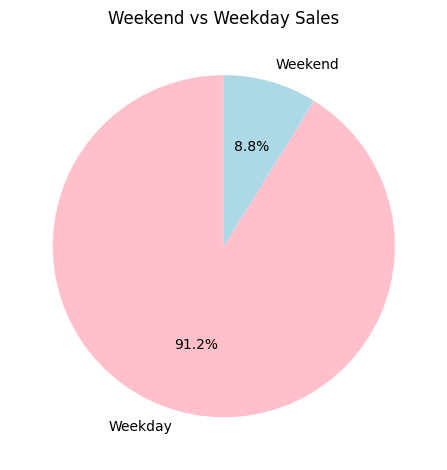

In [32]:
#Weekend vs Weekday
# 1. Add 'day_of_week' column
df['day_of_week'] = df['InvoiceDate'].dt.day_name()

# 2. Tag each row as 'Weekday' or 'Weekend'
df['day_type'] = df['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# 3. Group by 'day_type' and sum sales
day_type_sales = df.groupby('day_type')['sales'].sum()

# 4. Plot Pie Chart
colors = ['pink', 'lightblue']  # Customize colors if you'd like
day_type_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, 
                    ylabel='', title='Weekend vs Weekday Sales')
plt.tight_layout()
plt.show()

The pie chart shows that 91.2% of total sales occur on weekdays, while only 8.8% happen on weekends.
This suggests that the majority of customer activity and purchasing behavior takes place during the workweek.

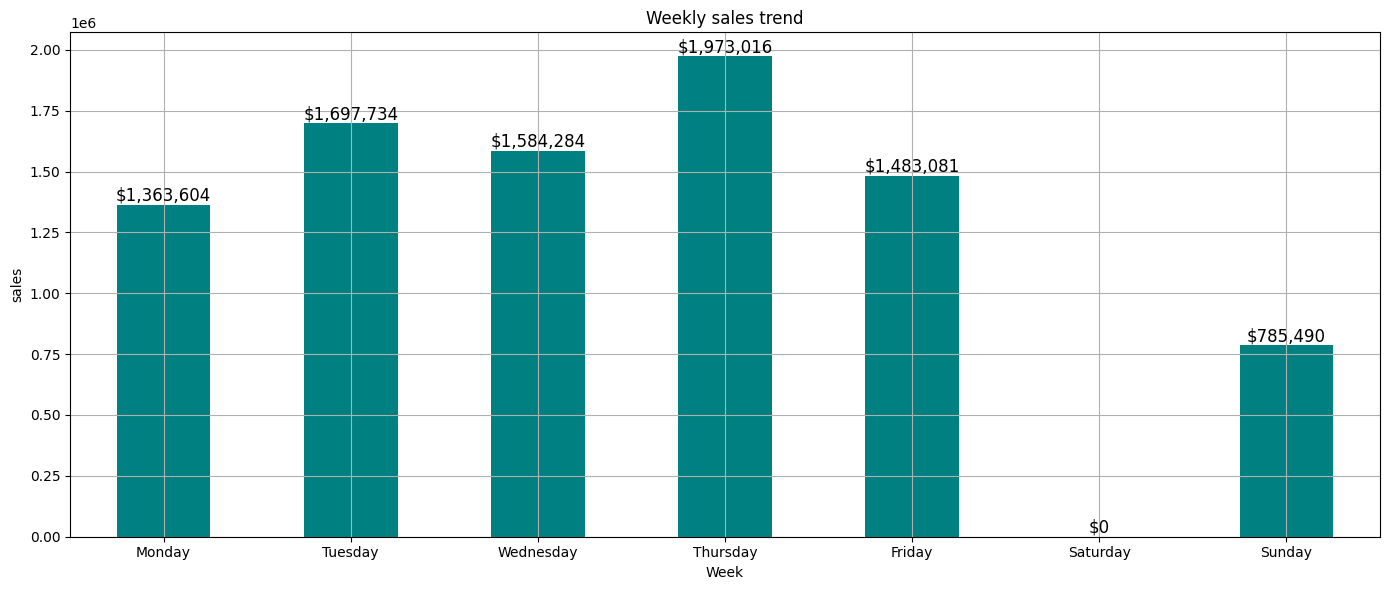

In [33]:
#Weekly Pattern: Busiest Day
df['day_of_week'] = df['InvoiceDate'].dt.day_name()
weekly_sales = df.groupby('day_of_week')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
fig, ax =plt.subplots(figsize=(14,6))
weekly_sales.plot(kind='bar',ax=ax,color='teal')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+200,
        f'${height:,.0f}',
        ha='center', va='bottom', fontsize=12
    )
ax.set_title('Weekly sales trend')
ax.set_xlabel('Week')
ax.set_ylabel("sales")
ax.grid(True)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [34]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date_only', 'Time_only', 'Year',
       'month', 'sales', 'hour', 'day_of_week', 'day_type'],
      dtype='object')

Weekly sales are more , compare to the weeken , as on saturday there is no sale at all, on thursday have the heights sales 

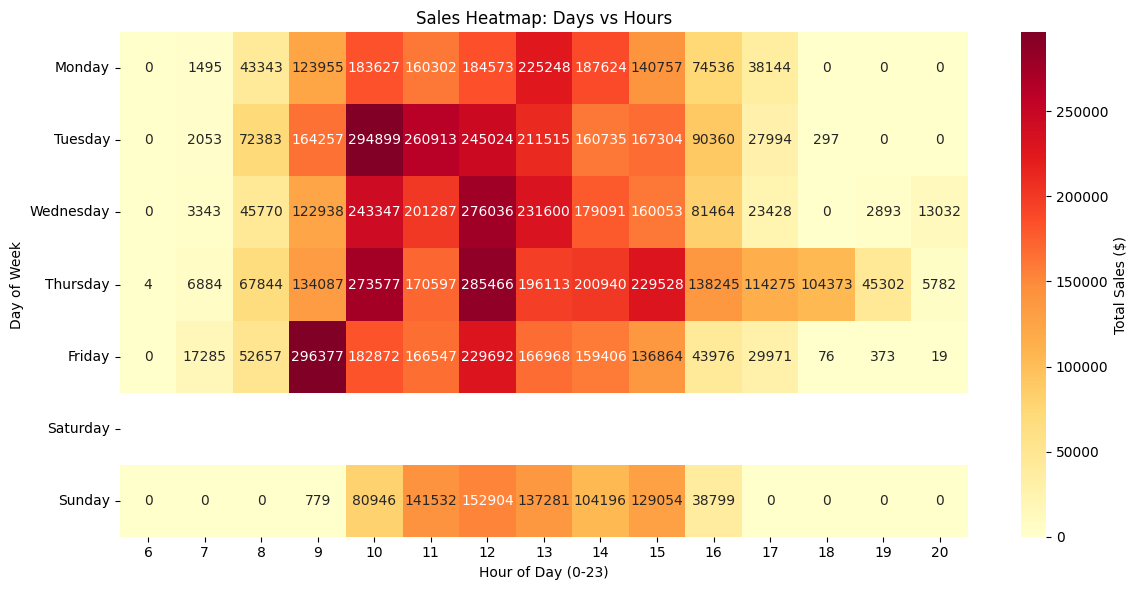

Heatmap Data Sample:
 hour           6         7         8           9           10         11  \
day_of_week                                                                
Monday       0.00   1494.58  43343.39  123955.190  183627.120  160302.06   
Tuesday      0.00   2052.58  72383.27  164256.880  294899.041  260912.59   
Wednesday    0.00   3343.46  45770.27  122937.900  243347.200  201287.22   
Thursday     4.25   6883.71  67844.25  134086.740  273576.910  170597.00   
Friday       0.00  17284.88  52656.61  296376.831  182871.600  166546.63   

hour                12         13         14         15         16  \
day_of_week                                                          
Monday       184573.40  225247.61  187624.20  140756.89   74536.32   
Tuesday      245024.38  211515.03  160735.04  167304.23   90360.21   
Wednesday    276035.54  231600.21  179091.44  160053.32   81464.31   
Thursday     285465.97  196112.66  200940.16  229527.65  138245.01   
Friday       229692.39  1

In [35]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(values='sales', index='day_of_week', columns='hour', aggfunc='sum', fill_value=0)

# Sort days of week for logical order (Mon-Sun)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Total Sales ($)'})

# Customize the plot
plt.title('Sales Heatmap: Days vs Hours')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# Print a sample of the data for verification
print("Heatmap Data Sample:\n", heatmap_data.head())

I noticed that sales really spike in the middle of the month—like, maybe people get paid and start shopping more. The hours chart showed me that mornings, especially around 9-11 AM, are super busy. When I checked days and weeks, weekdays stood out with higher sales comapred to weekends.

In [36]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date_only', 'Time_only', 'Year',
       'month', 'sales', 'hour', 'day_of_week', 'day_type'],
      dtype='object')

In [37]:
df['Country'].nunique()

37

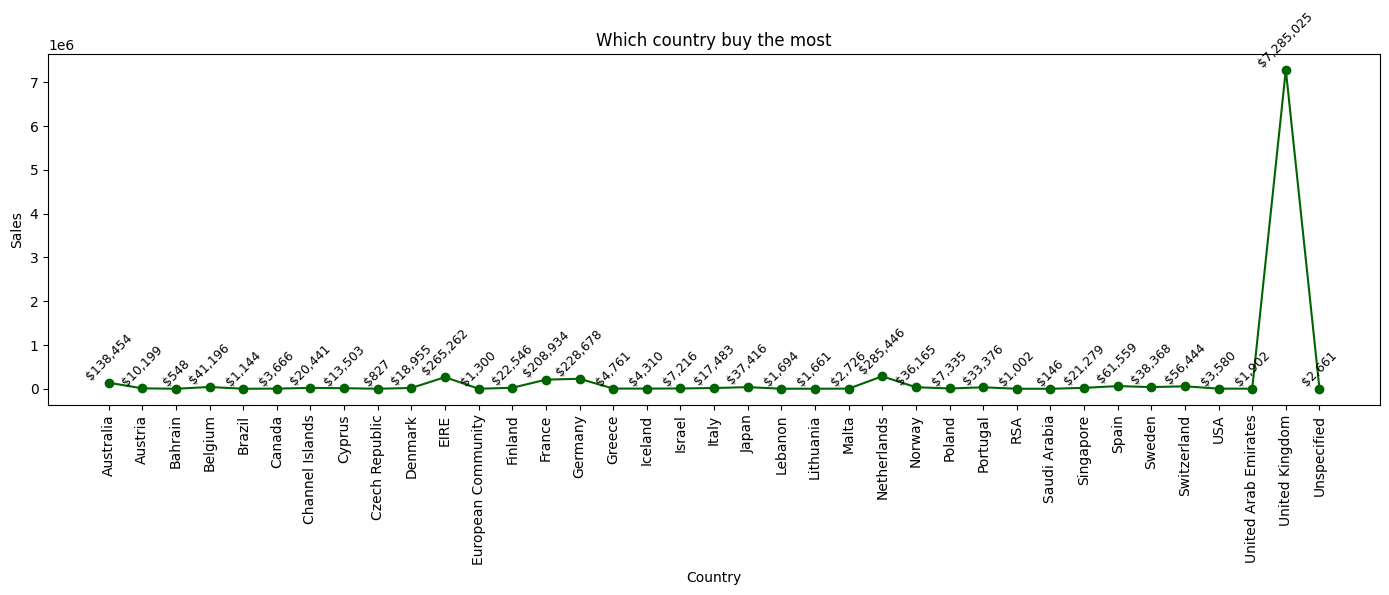

In [38]:
TopCountry_sales = df.groupby('Country')['sales'].sum().reset_index()

fig, ax =plt.subplots(figsize=(14,6))

ax.plot(TopCountry_sales['Country'], TopCountry_sales['sales'], marker='o', color='darkgreen')

for i, (x,y) in enumerate(zip(TopCountry_sales['Country'], TopCountry_sales['sales'])):
    ax.annotate(
        f'${y:,.0f}',
        (x,y+100),
        ha='center', va='bottom', fontsize=9, rotation=45
    )
ax.set_title('Which country buy the most')    
ax.set_xlabel('Country')
ax.set_ylabel('Sales')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

We are having the heigst sales from united Kingdom

In [39]:
df['Country'].nunique()

37

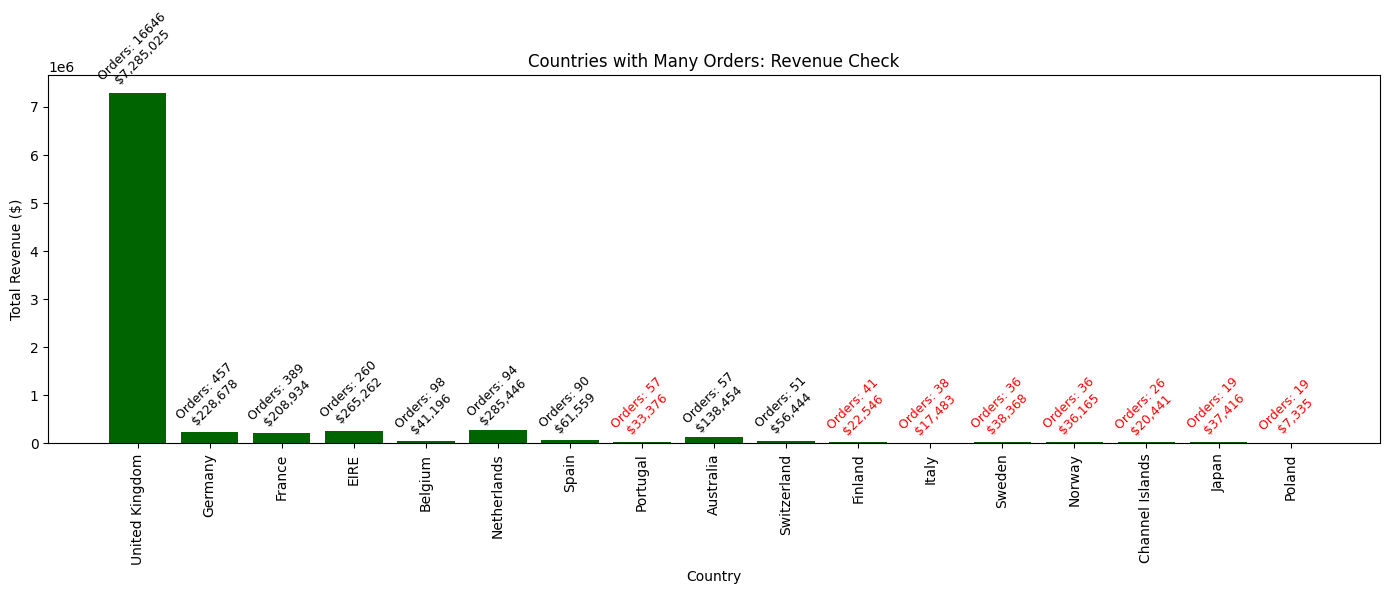

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate orders and revenue per country
country_stats = df.groupby('Country').agg({
    'InvoiceNo': 'nunique',  # Count unique orders
    'sales': 'sum'          # Total revenue
}).reset_index()

# Step 2: Sort by order count and get top 10 countries
top_countries = country_stats.sort_values('InvoiceNo', ascending=False).head(17)

# Step 3: Define a revenue threshold for "low revenue" (e.g., median of top countries)
revenue_threshold = top_countries['sales'].median()

# Step 4: Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot orders as bars
ax.bar(top_countries['Country'], top_countries['sales'], color='darkgreen')

# Add annotations for sales and flag low revenue
for i, (country, orders, sales) in enumerate(zip(top_countries['Country'], top_countries['InvoiceNo'], top_countries['sales'])):
    label = f'Orders: {orders}\n${sales:,.0f}'
    color = 'red' if sales < revenue_threshold else 'black'  # Red for low revenue
    ax.text(
        i, sales + 100,  # Position above bar
        label,
        ha='center', va='bottom', fontsize=9, color=color, rotation=45
    )

# Customize the plot
ax.set_title('Countries with Many Orders: Revenue Check')
ax.set_xlabel('Country')
ax.set_ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


So in 'Portugal' we can see that they the Invoice num as same as 'Australia' 57, but sales is less than 'Autralia' which is $ 33,376 , other than i  cant see the much diffrence in between sales and nuber of orders.

In [41]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date_only', 'Time_only', 'Year',
       'month', 'sales', 'hour', 'day_of_week', 'day_type'],
      dtype='object')

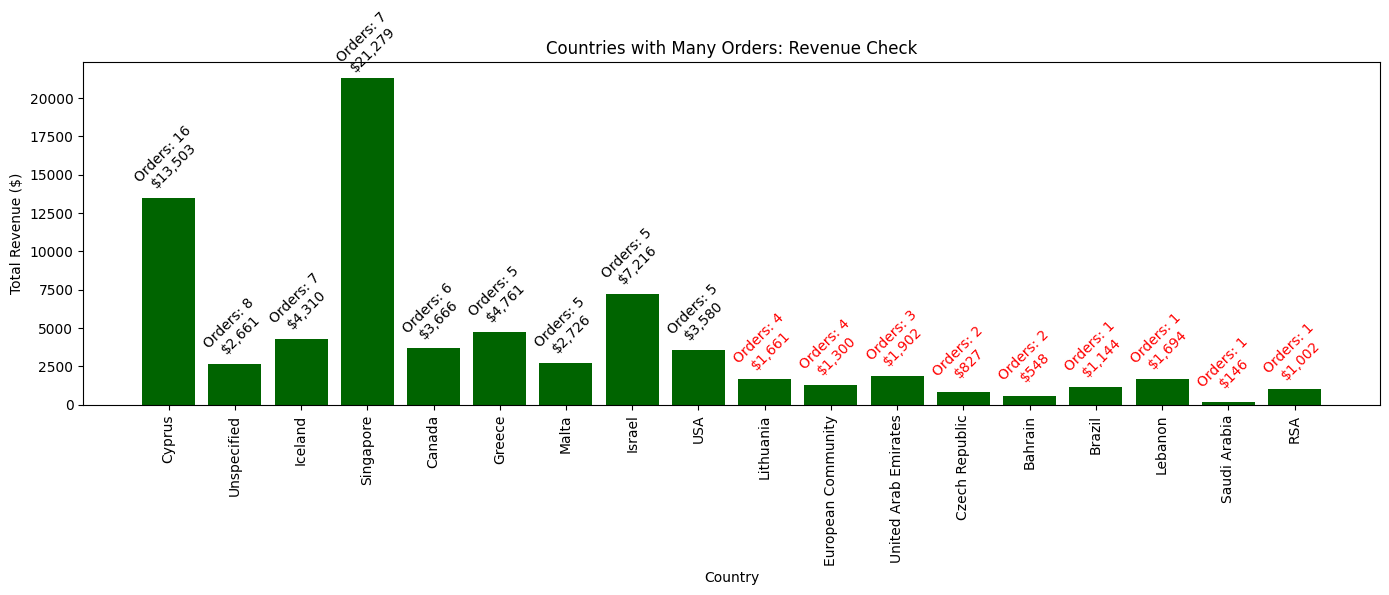

In [42]:
country_stats=df.groupby('Country').agg({'InvoiceNo' : 'nunique', 
                                         'sales' : 'sum'}).reset_index()
top_countries=country_stats.sort_values('InvoiceNo', ascending=False).tail(18)
revenue_threshold=top_countries['sales'].median()
fig, ax=plt.subplots(figsize=(14,6))
ax.bar(top_countries['Country'], top_countries['sales'], color='darkgreen')
for i ,(country, orders, sales) in enumerate(zip(top_countries['Country'],top_countries['InvoiceNo'],top_countries['sales'])):
    label=f'Orders: {orders}\n${sales:,.0f}'
    color='red' if sales<revenue_threshold else 'black'
    ax.text(
        i, sales+100,
        label,
        ha='center', va='bottom', fontsize=10, color=color, rotation = 45
    )
ax.set_title('Countries with Many Orders: Revenue Check')
ax.set_xlabel('Country')
ax.set_ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


I see "Cyprus"  with 16 orders and $13,502.85 in sales, which is good, but "Unspecified" with 8 orders and only $2,660.77, "Singapore" with 7 orders has $21,279.29, which is nice, but "Iceland" with 7 orders and $4,310 feels low. It’s like these countries order a lot, but revenue is not matching.

In [43]:
df['StockCode'].nunique()

3665

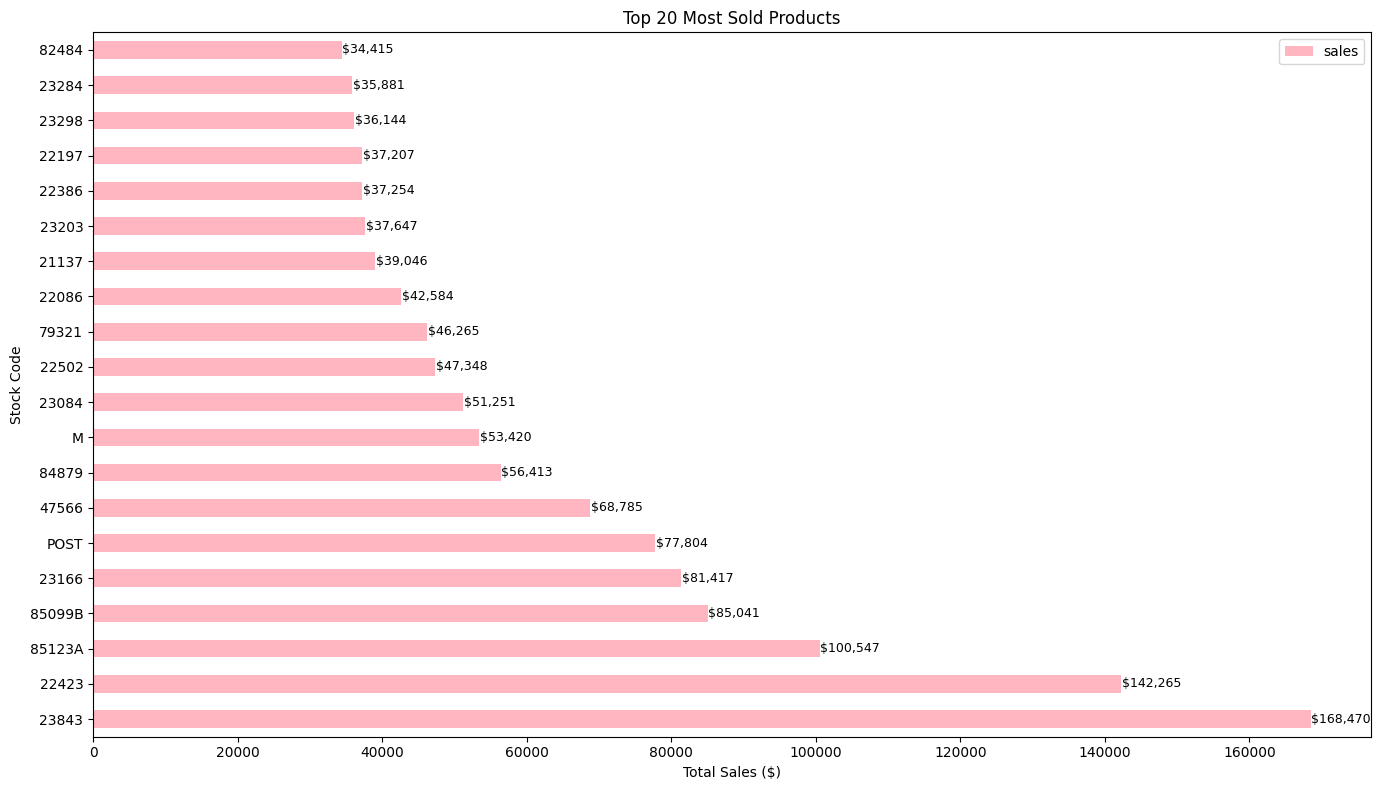

In [74]:
#Which products are sold the most
mostsold_product = df.groupby('StockCode')['sales'].sum().reset_index().sort_values('sales', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(14, 8))  
mostsold_product.plot(kind='barh', x='StockCode', y='sales', ax=ax, color='lightpink')
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 100, 
        bar.get_y() + bar.get_height()/2,  
        f'${width:,.0f}',  
        ha='left', va='center', fontsize=9
    )


ax.set_title('Top 20 Most Sold Products')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Stock Code')
plt.tight_layout()
plt.show()


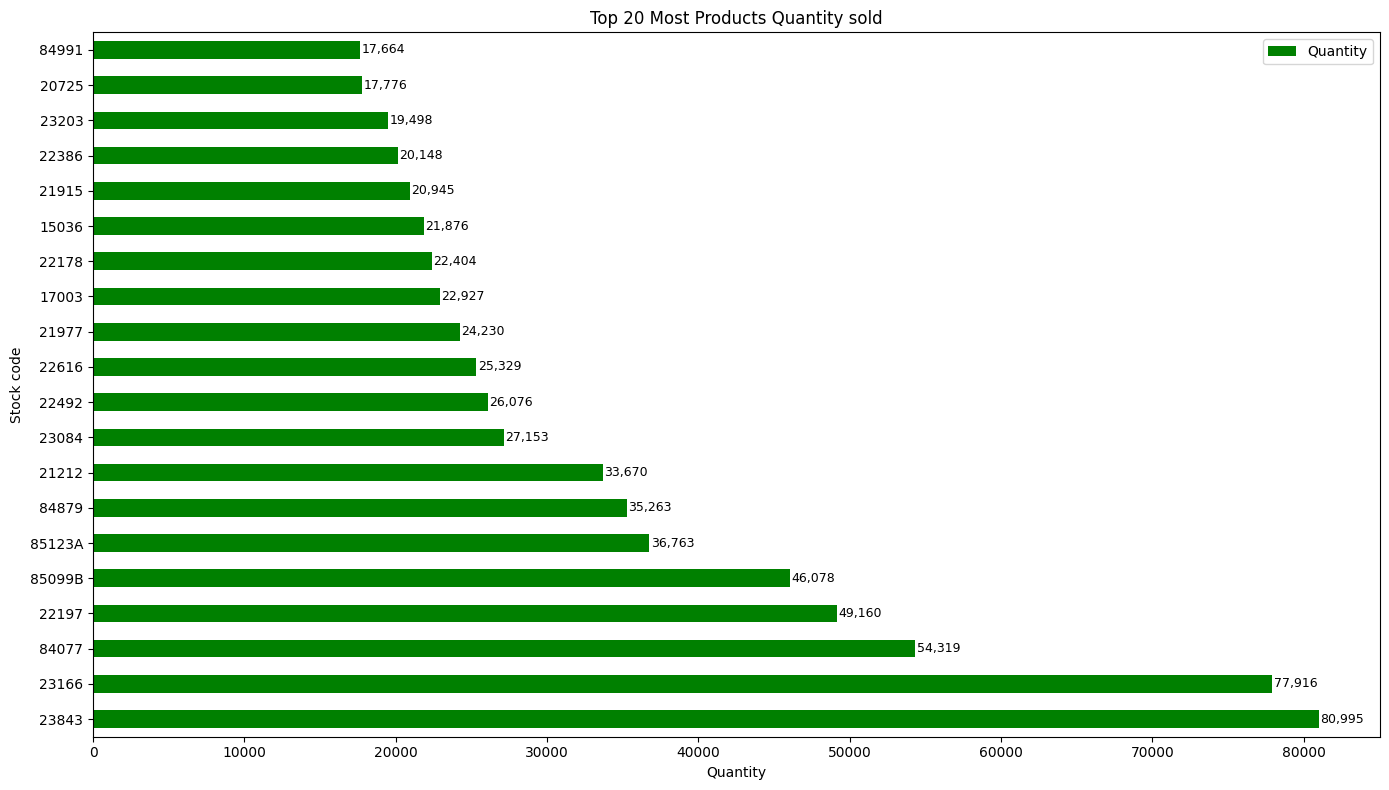

In [45]:
#Which products Quantity sold the most
mostsold_quantity = df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(14, 8))  
mostsold_quantity.plot(kind='barh', x='StockCode', y='Quantity', ax=ax, color='green')
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 100, 
        bar.get_y() + bar.get_height()/2,  
        f'{width:,.0f}',  
        ha='left', va='center', fontsize=9
    )


ax.set_title('Top 20 Most Products Quantity sold')
ax.set_xlabel('Quantity')
ax.set_ylabel('Stock code')
plt.tight_layout()
plt.show()


Checking these charts.I see "23843" is the big winner with 80,995 units sold and $168,469.60 in sales looks like it’s super popular and brings good money, 23166" also sells a lot with 77,916 units, but its sales are only $81,416.73, so maybe it’s cheaper stuff. Then, "22423" jumps to $142,264.75 in sales but only shows up in the sales list—not so much in quantity—could be a pricey item. "85099B" is nice with 46,078 units and $85,040.54, showing it sells well and earns too.

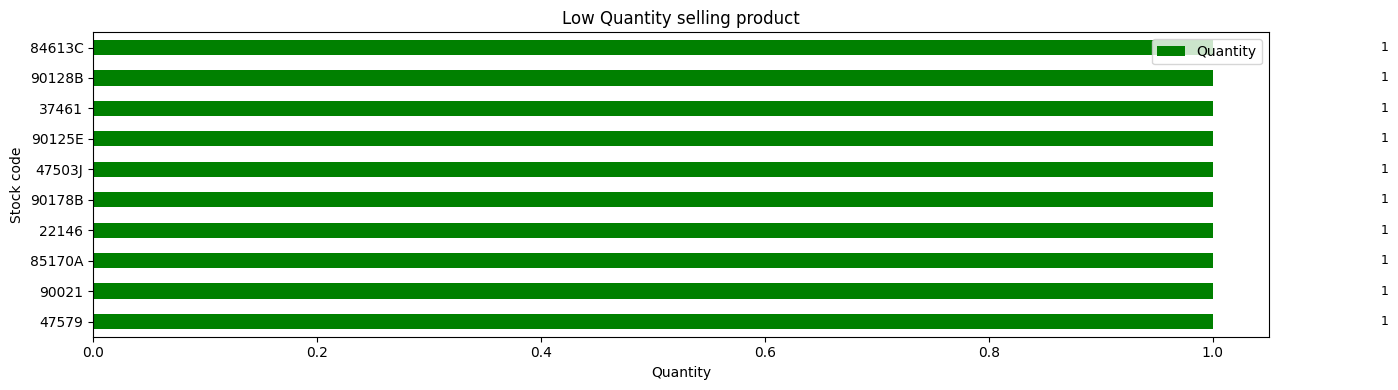

     StockCode  Quantity
2600     47579         1
3368     90021         1
3276    85170A         1
1041     22146         1
3567    90178B         1
2586    47503J         1
3491    90125E         1
2505     37461         1
3492    90128B         1
2923    84613C         1


In [46]:
# low-selling products
Low_Quantityselling_product = df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=True).head(10)

fig, ax = plt.subplots(figsize=(14, 4))  
Low_Quantityselling_product.plot(kind='barh', x='StockCode', y='Quantity', ax=ax, color='green')
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + .15, 
        bar.get_y() + bar.get_height()/2,  
        f'{width:,.0f}',  
        ha='left', va='center', fontsize=9
    )
ax.set_title('Low Quantity selling product')
ax.set_xlabel('Quantity')
ax.set_ylabel('Stock code')
plt.tight_layout()
plt.show()
print(Low_Quantityselling_product[['StockCode', 'Quantity']])

I see "47579", "90021", and "85170A" all sold just 1 unit each—seems like they’re not moving much, huh. Same with "22146", "90178B", and the rest, all stuck at 1. 

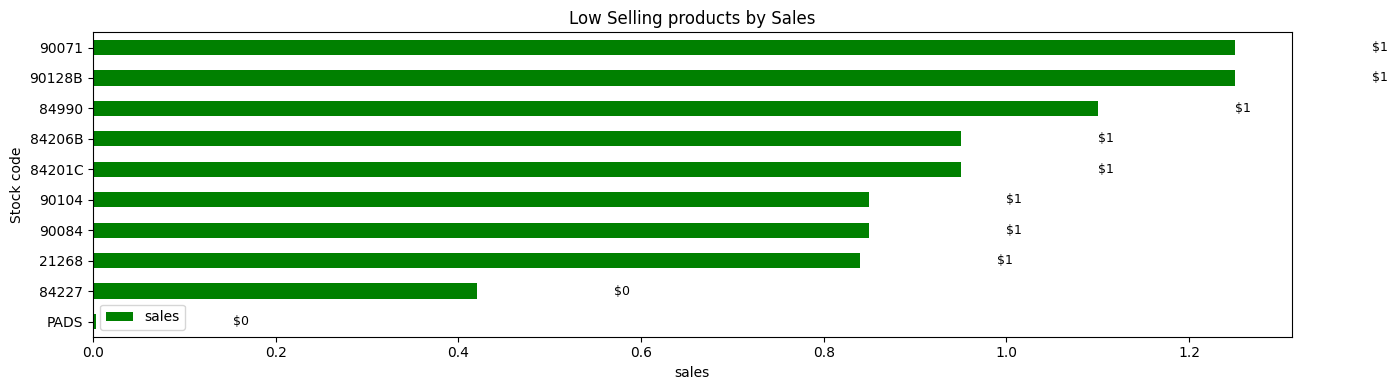

     StockCode  sales
3663      PADS  0.003
2818     84227  0.420
460      21268  0.840
3454     90084  0.850
3468     90104  0.850
2811    84201C  0.950
2813    84206B  0.950
3129     84990  1.100
3492    90128B  1.250
3441     90071  1.250


In [75]:
# low-selling products
Lowselling_product = df.groupby('StockCode')['sales'].sum().reset_index().sort_values('sales', ascending=True).head(10)

fig, ax = plt.subplots(figsize=(14, 4))  
Lowselling_product.plot(kind='barh', x='StockCode', y='sales', ax=ax, color='green')
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + .15, 
        bar.get_y() + bar.get_height()/2,  
        f'${width:,.0f}',  
        ha='left', va='center', fontsize=9
    )
ax.set_title('Low Selling products by Sales')
ax.set_xlabel('sales')
ax.set_ylabel('Stock code')
plt.tight_layout()
plt.show()
print(Lowselling_product[['StockCode', 'sales']])

Checking this today was fun! I see "47579", "90021", and "85170A" all sold just 1 unit—looks like they’re not popular, huh. Then, looking at the sales list, "PADS" with $0.003 and "84227" with $0.420 are super low—maybe they’re tiny items or freebies? "90128B" shows up in both lists with 1 unit and $1.250, so it’s not selling much and barely makes money.

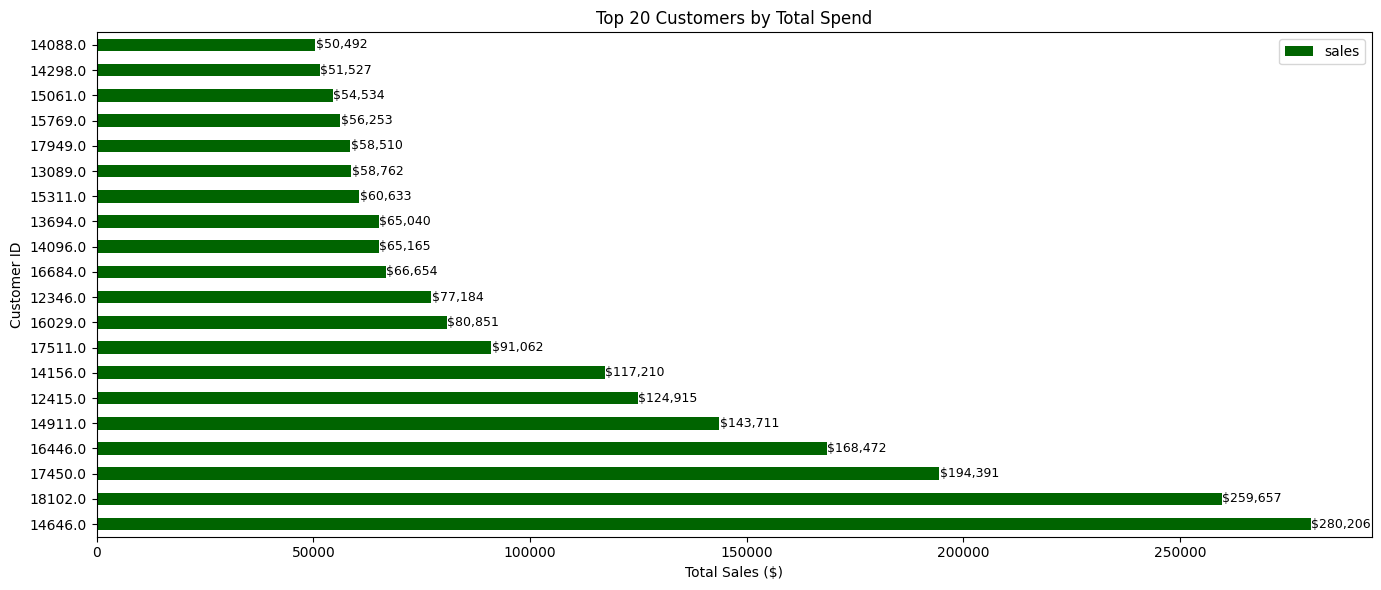

Top 20 Customers by Total Spend:
       CustomerID      sales
1689     14646.0  280206.02
4201     18102.0  259657.30
3728     17450.0  194390.79
3008     16446.0  168472.50
1879     14911.0  143711.17
55       12415.0  124914.53
1333     14156.0  117210.08
3771     17511.0   91062.38
2702     16029.0   80850.84
0        12346.0   77183.60
3176     16684.0   66653.56
1289     14096.0   65164.79
996      13694.0   65039.62
2176     15311.0   60632.75
562      13089.0   58762.08
4093     17949.0   58510.48
2517     15769.0   56252.72
1983     15061.0   54534.14
1434     14298.0   51527.30
1284     14088.0   50491.81


In [48]:
# top customers by total spend
TopCustomers_sales = df.groupby('CustomerID')['sales'].sum().reset_index().sort_values('sales', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(14, 6))
TopCustomers_sales.plot(kind='barh', x='CustomerID', y='sales', ax=ax, color='darkgreen')

for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 100,  
        bar.get_y() + bar.get_height()/2, 
        f'${width:,.0f}', 
        ha='left', va='center', fontsize=9
    )

ax.set_title('Top 20 Customers by Total Spend')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Customer ID')
plt.tight_layout()
plt.show()

print("Top 20 Customers by Total Spend:\n", TopCustomers_sales)

"14646.0" spent $280,206.02—big spender, "18102.0" with $259,657.30 and "17450.0" with $194,390.79 are also huge. "14911.0" shows up here with $143,711.17, which matches their 5,670 orders—seems they buy a lot each time. 

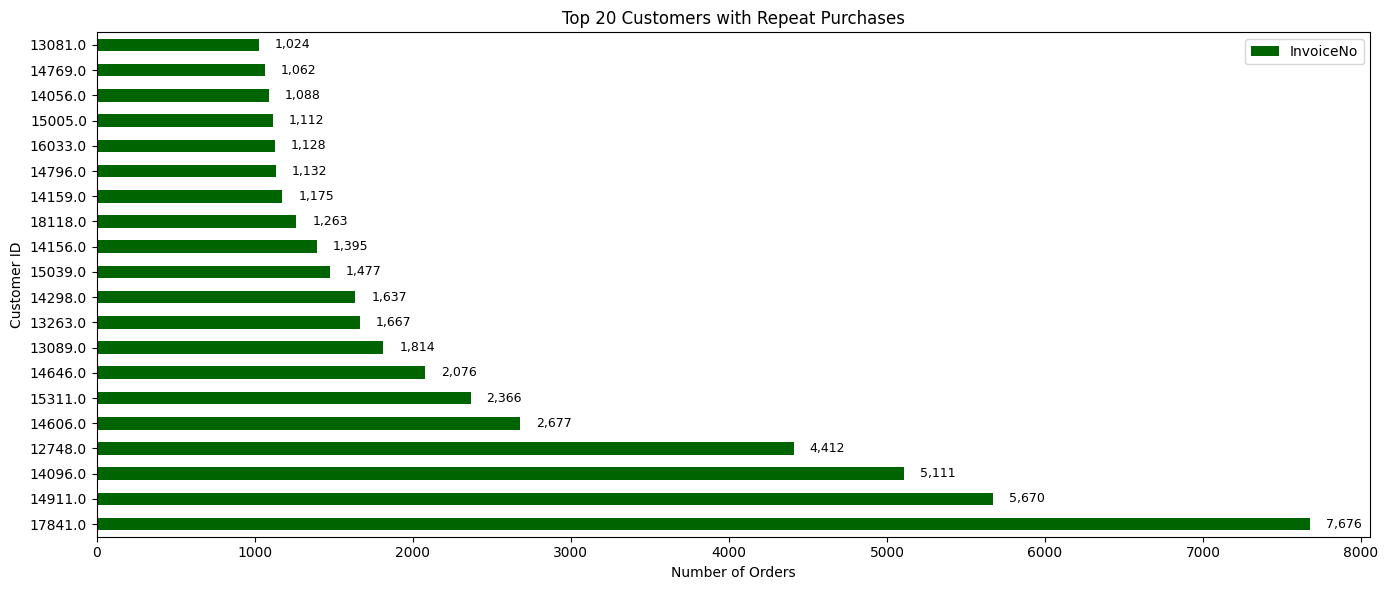

Top 20 Customers with Repeat Purchases:
       CustomerID  InvoiceNo
4010     17841.0       7676
1879     14911.0       5670
1289     14096.0       5111
326      12748.0       4412
1661     14606.0       2677
2176     15311.0       2366
1689     14646.0       2076
562      13089.0       1814
690      13263.0       1667
1434     14298.0       1637
1964     15039.0       1477
1333     14156.0       1395
4213     18118.0       1263
1336     14159.0       1175
1797     14796.0       1132
2705     16033.0       1128
1937     15005.0       1112
1262     14056.0       1088
1779     14769.0       1062
558      13081.0       1024


In [52]:
#Do customers come back and buy again

TopCustomers_buy_again = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
repeat_buyers = TopCustomers_buy_again[TopCustomers_buy_again['InvoiceNo'] > 1].sort_values('InvoiceNo', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(14, 6))
repeat_buyers.plot(kind='barh', x='CustomerID', y='InvoiceNo', ax=ax, color='darkgreen')

for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 100,  
        bar.get_y() + bar.get_height()/2, 
        f'{width:,.0f}', 
        ha='left', va='center', fontsize=9
    )

ax.set_title('Top 20 Customers with Repeat Purchases')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Customer ID')
plt.tight_layout()
plt.show()

print("Top 20 Customers with Repeat Purchases:\n", repeat_buyers)

I see "17841.0" with 7,676 they come back a lot, "14911.0" with 5,670 and "14096.0" with 5,111 also shop again and again. It’s cool to see "12748.0" with 4,412 orders too.

In [50]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date_only', 'Time_only', 'Year',
       'month', 'sales', 'hour', 'day_of_week', 'day_type'],
      dtype='object')

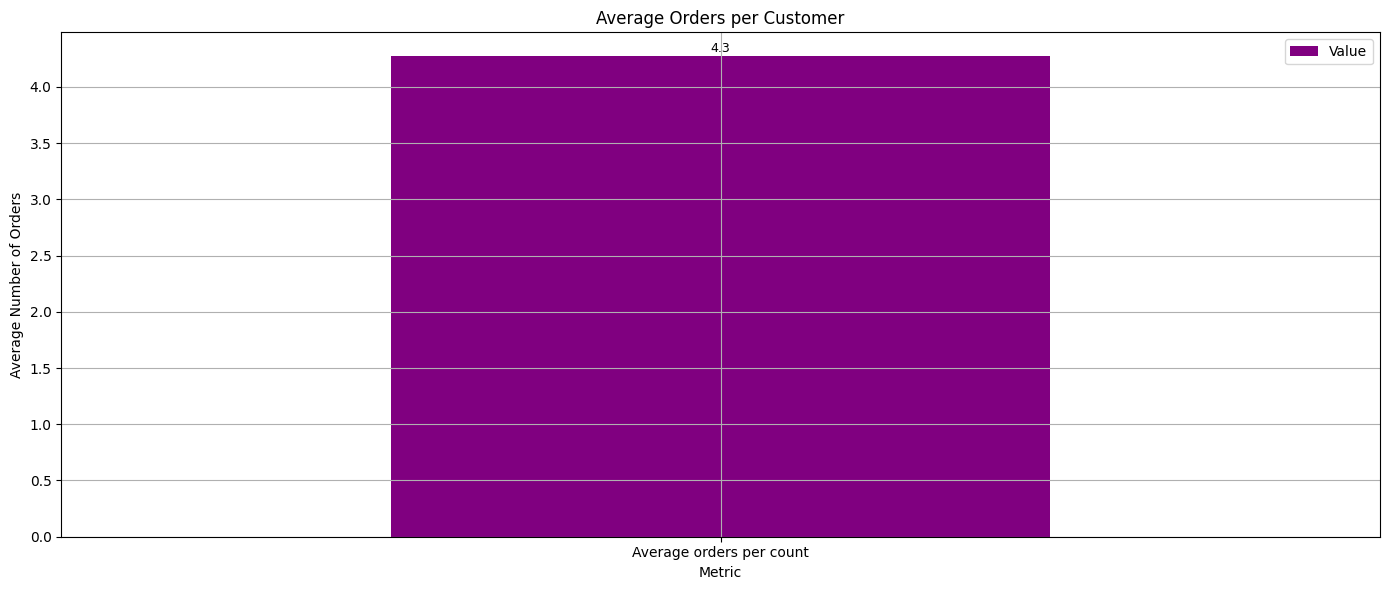

Average Orders per Customer:
                      Matric     Value
0  Average orders per count  4.272015


In [69]:
#orders per customer on average
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_orders = df['InvoiceNo'].nunique()
total_customers= len(orders_per_customer)
avg_orders_per_customer=total_orders / total_customers
avg_data = pd.DataFrame({'Matric':['Average orders per count'], 'Value':[avg_orders_per_customer]})

fig, ax =plt.subplots(figsize=(14,6))
avg_data.plot(kind='bar', x='Matric', y='Value', ax=ax,color='purple')

for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+.01,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
ax.set_title('Average Orders per Customer')
ax.set_xlabel('Metric')
ax.set_ylabel('Average Number of Orders')
ax.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print results
print("Average Orders per Customer:\n", avg_data)

I see the average is 4.27 orders per customer—means people come back a few times, With just one bar, it shows the overall picture, not each customer.

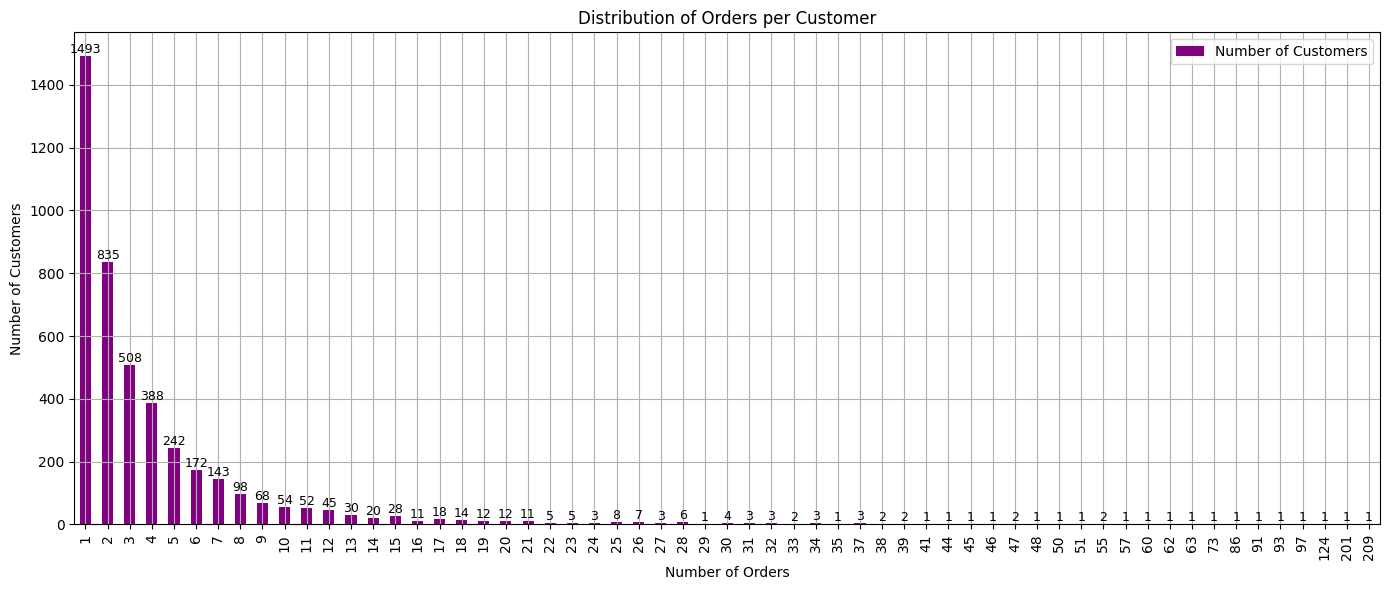

Distribution of Orders per Customer:
     Number of Orders  Number of Customers
0                  1                 1493
1                  2                  835
2                  3                  508
3                  4                  388
4                  5                  242
5                  6                  172
6                  7                  143
7                  8                   98
8                  9                   68
9                 10                   54
10                11                   52
11                12                   45
12                13                   30
13                14                   20
14                15                   28
15                16                   11
16                17                   18
17                18                   14
18                19                   12
19                20                   12
20                21                   11
21                22                  

In [71]:

orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().value_counts().sort_index().reset_index()
orders_per_customer.columns = ['Number of Orders', 'Number of Customers']

fig, ax = plt.subplots(figsize=(14, 6))
orders_per_customer.plot(x='Number of Orders', y='Number of Customers', kind='bar', ax=ax, color='purple')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height + 0.01, 
            f'{height:.0f}', 
            ha='center', va='bottom', fontsize=9)

ax.set_title('Distribution of Orders per Customer')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Number of Customers')
ax.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("Distribution of Orders per Customer:\n", orders_per_customer)

I see 1,493 customers bought just once—lots of one-timers. But then 835 came back for 2 orders, and 508 for 3. It gets smaller as it goes, with only 1 customer hitting 209 orders. The average was 4.27, so some really stick around. 